In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import io, signal

In [2]:
file_path = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Probetas JI\probetas\2025 methodology\7\7.tif')

volume = io.load_tif(file_path)

In [3]:
rf = volume[:, np.random.randint(0, volume.shape[1]), np.random.randint(0, volume.shape[2])].astype(np.float16) - 128

In [4]:
envelope = signal.envelope(rf)

iq = signal.convert_to_IQ(rf)

In [5]:
#4281a4, #48a9a6, #e4dfda, #4c3b4d, #e980fc

In [6]:
# Enhanced Professional Plot Theme Configuration
# Color palette: #4281a4 (primary blue), #4c3b4d (deep purple), #48a9a6 (teal), #e4dfda (light beige), #e980fc (magenta)

def apply_plot_theme():
    """Apply the enhanced professional plot theme to current figure"""
    fig = plt.gcf()
    ax = plt.gca()
    
    # Set figure size and colors
    fig.set_size_inches(10, 6)
    fig.patch.set_facecolor('#f8f6f4')  # Slightly warmer white background
    ax.set_facecolor('#fdfcfb')  # Very light warm background for plot area
    
    # Configure enhanced grid
    ax.grid(True, axis='y', alpha=0.4, color='#e4dfda', linewidth=0.8, linestyle='-')
    ax.grid(True, axis='x', alpha=0.2, color='#e4dfda', linewidth=0.5, linestyle=':')
    ax.set_axisbelow(True)
    
    # Enhanced text styling with better contrast
    ax.tick_params(colors='#4c3b4d', labelsize=11, width=1.2)  # Deep purple tick labels
    ax.xaxis.label.set_color('#4c3b4d')  # Deep purple for better readability
    ax.yaxis.label.set_color('#4c3b4d')  # Deep purple for better readability
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)
    ax.xaxis.label.set_fontweight('medium')
    ax.yaxis.label.set_fontweight('medium')
    
    # Enhanced spine styling
    for spine in ax.spines.values():
        spine.set_color('#4c3b4d')
        spine.set_linewidth(1.3)
        spine.set_alpha(0.8)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Enhanced legend styling
    legend = ax.get_legend()
    if legend:
        legend.get_frame().set_facecolor('#fdfcfb')
        legend.get_frame().set_edgecolor('#4c3b4d')
        legend.get_frame().set_linewidth(1.2)
        legend.get_frame().set_alpha(0.95)
        for text in legend.get_texts():
            text.set_color('#4c3b4d')
            text.set_fontsize(11)
            text.set_fontweight('medium')
        # Add subtle shadow to legend
        legend.get_frame().set_boxstyle("round,pad=0.5")
    
    # Enhanced layout with better spacing
    plt.tight_layout(pad=2.5)
    
    # Subtle border around the entire plot
    fig.patch.set_linewidth(1)
    fig.patch.set_edgecolor('#e4dfda')

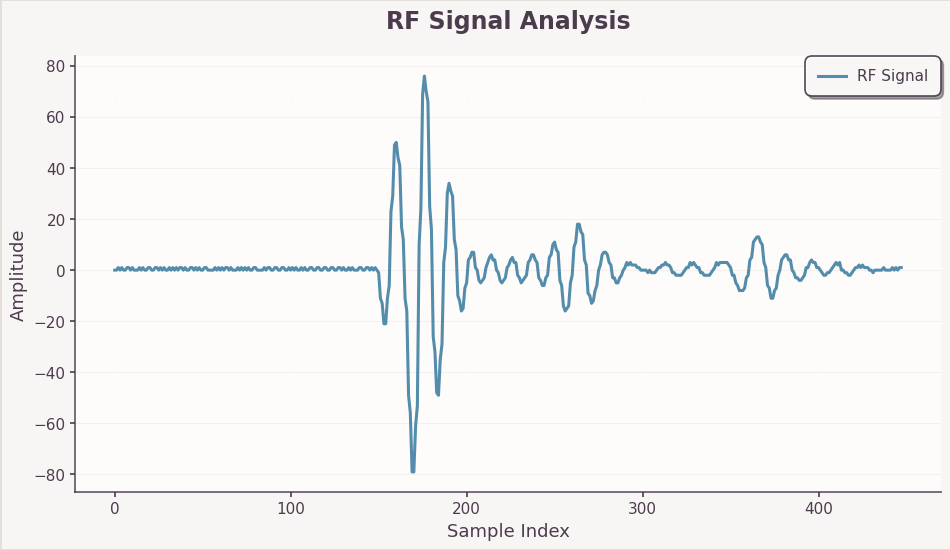

In [7]:
# Enhanced RF signal plot
plt.figure(figsize=(10, 6))
plt.plot(rf, label='RF Signal', color='#4281a4', linewidth=2.2, alpha=0.9)
plt.title('RF Signal Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

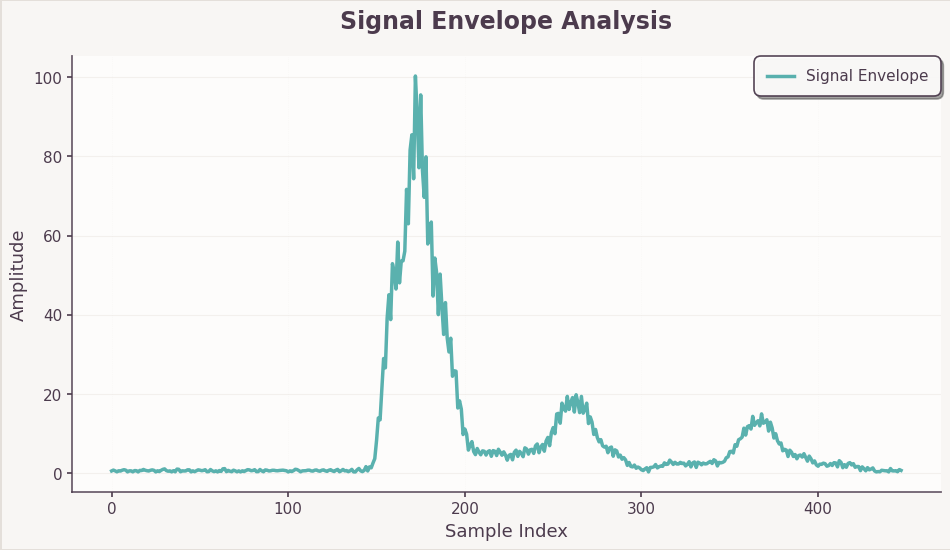

In [8]:
# Enhanced envelope plot
plt.figure(figsize=(10, 6))
plt.plot(envelope, label='Signal Envelope', color='#48a9a6', linewidth=2.5, alpha=0.9)
plt.title('Signal Envelope Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

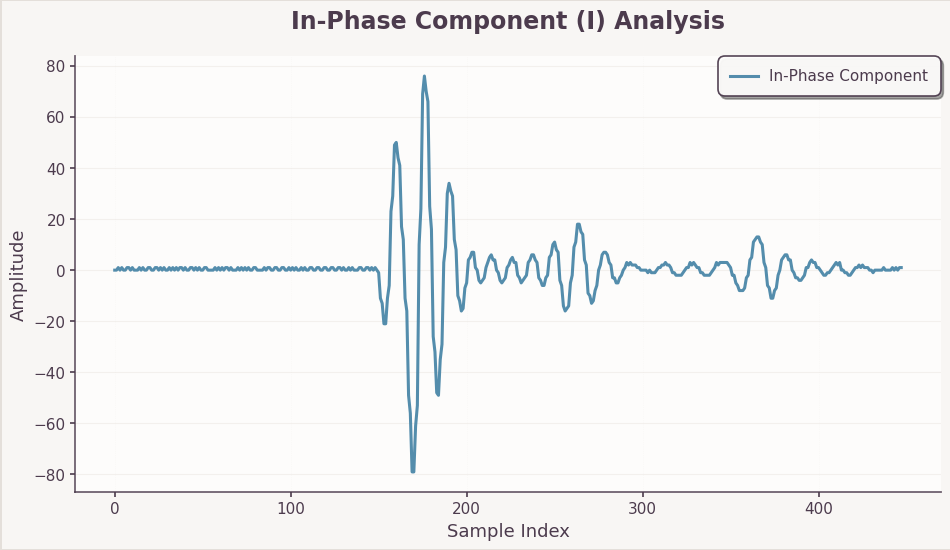

In [34]:
# Enhanced in-phase component plot
plt.figure(figsize=(10, 6))
plt.plot(iq[0], label='In-Phase Component', color='#4281a4', linewidth=2.2, alpha=0.9)
plt.title('In-Phase Component (I) Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)

# # Enhanced quadrature component plot
# plt.plot(iq[1], label='Quadrature Component', color='#e980fc', linewidth=2.2, alpha=0.9)
# plt.title('Quadrature Component (Q) Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
# plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
# plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
# plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

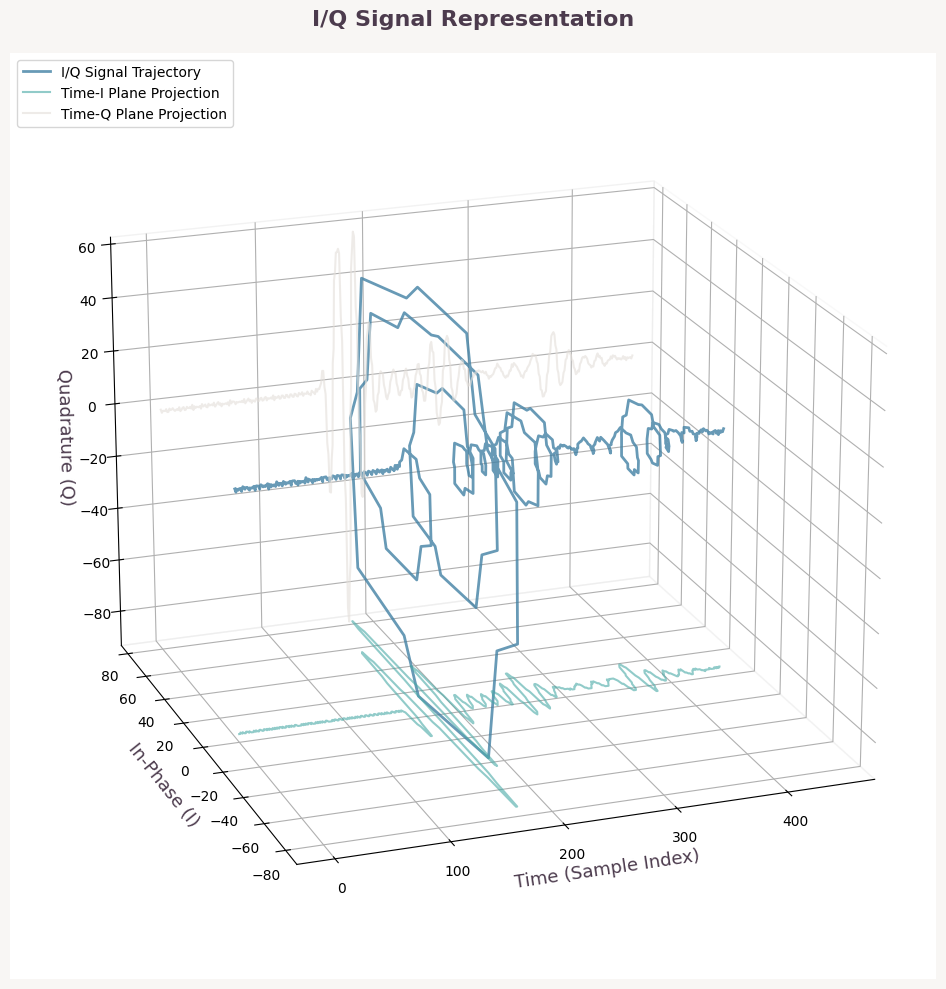

In [31]:
# 3D I/Q Signal Visualization
from mpl_toolkits.mplot3d import Axes3D

# Create time axis
time_axis = np.arange(len(iq[0]))

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D trajectory of the I/Q signal (time on X-axis, now pointing right)
ax.plot(time_axis, iq[0], iq[1], color='#4281a4', linewidth=2.0, alpha=0.8, label='I/Q Signal Trajectory')

# Add projections onto the coordinate planes for reference
ax.plot(time_axis, iq[0], np.min(iq[1]), color='#48a9a6', alpha=0.6, linewidth=1.5, label='Time-I Plane Projection')
ax.plot(time_axis, np.max(iq[0]), iq[1], color='#e4dfda', alpha=0.6, linewidth=1.5, label='Time-Q Plane Projection')

# Set the viewing angle (elevation, azimuth)
ax.view_init(elev=20, azim=-110)  # Adjust these values to rotate the plot

# Enhance the 3D plot appearance
ax.set_xlabel('Time (Sample Index)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_ylabel('In-Phase (I)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_zlabel('Quadrature (Q)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_title('I/Q Signal Representation', 
             fontsize=16, color='#4c3b4d', pad=20, fontweight='bold')

# Customize the 3D plot theme
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

# Set background color
fig.patch.set_facecolor('#f8f6f4')

plt.tight_layout()
plt.show()

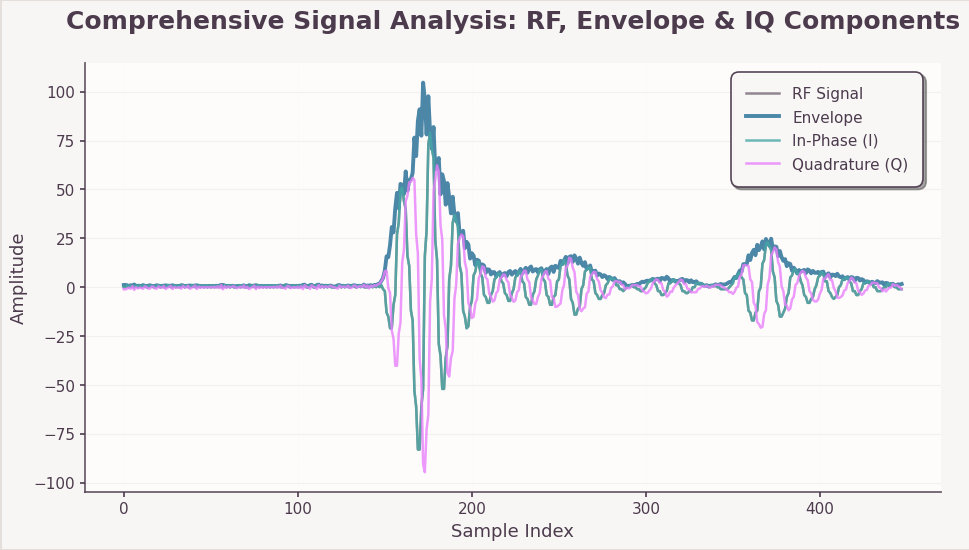

In [55]:
# Enhanced combined plot with optimal color distribution
plt.figure(figsize=(12, 7))
plt.plot(rf, label='RF Signal', color='#4c3b4d', linewidth=1.8, alpha=0.6, linestyle='-')
plt.plot(envelope, label='Envelope', color='#4281a4', linewidth=2.8, alpha=0.95)
plt.plot(iq[0], label='In-Phase (I)', color='#48a9a6', linewidth=1.8, alpha=0.8)
plt.plot(iq[1], label='Quadrature (Q)', color='#e980fc', linewidth=1.8, alpha=0.8)

plt.title('Comprehensive Signal Analysis: RF, Envelope & IQ Components', 
          fontsize=18, color='#4c3b4d', pad=25, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=14, color='#4c3b4d', fontweight='medium')

# Enhanced legend with better positioning
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, 
          bbox_to_anchor=(0.98, 0.98), fontsize=12)

apply_plot_theme()
plt.show()